In [7]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load dataset, using different encoding due to non printable ascii characters

df = pd.read_csv('./datasets/spotify-2023.csv', encoding="latin")

# Test if dataset is loaded
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [9]:
# Display info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    int64 
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    object
 12  in_deezer_charts      952 non-null    int64 
 13  in_shazam_charts      902 non-null    object
 14  bpm                   952 non-null    int64 
 15  key                   857 non-null    ob

# Cleaning the dataset

1. The dataset contains some empty values. We will drop all rows that contain any empty values. 

In [11]:
# Drops values that are empty

df.dropna(axis=0, how='any', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 951
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            816 non-null    object
 1   artist(s)_name        816 non-null    object
 2   artist_count          816 non-null    int64 
 3   released_year         816 non-null    int64 
 4   released_month        816 non-null    int64 
 5   released_day          816 non-null    int64 
 6   in_spotify_playlists  816 non-null    int64 
 7   in_spotify_charts     816 non-null    int64 
 8   streams               816 non-null    int64 
 9   in_apple_playlists    816 non-null    int64 
 10  in_apple_charts       816 non-null    int64 
 11  in_deezer_playlists   816 non-null    object
 12  in_deezer_charts      816 non-null    int64 
 13  in_shazam_charts      816 non-null    object
 14  bpm                   816 non-null    int64 
 15  key                   816 non-null    object


2. Some integers contain ",". We will remove all "," within the dataset so the strings can be converted to integers properly.

In [35]:
target_columns = ["in_deezer_playlists", "in_shazam_charts"]

for column in target_columns:
    df[column] = df[column].apply(lambda x: x.replace(",", ""))

df["in_shazam_charts"].head(13)

0      826
1      382
2      949
3      548
4      425
5      946
6      418
7      194
8      953
9      339
10     251
11     168
13    1281
Name: in_shazam_charts, dtype: object

3. We choose to sum up chart appearances and playlists appearances into their individual columns

In [39]:
def combine_columns(data: pd.DataFrame, result: str, targets: list):
    data[result] = data[targets].sum(axis=1)
    for target in targets:
        data.drop(target, axis=1, inplace=True)

combine_columns(df, "in_charts", ['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts'])
combine_columns(df, "in_playlists", ['in_spotify_playlists','in_apple_playlists','in_deezer_playlists'])

KeyError: "None of [Index(['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts'], dtype='object')] are in the [columns]"

In [ ]:
# Plot a correlation matrix

cmatrix = df.corr(numeric_only=True)

sns.heatmap(cmatrix)
plt.title('Correlation Matrix')
plt.show()

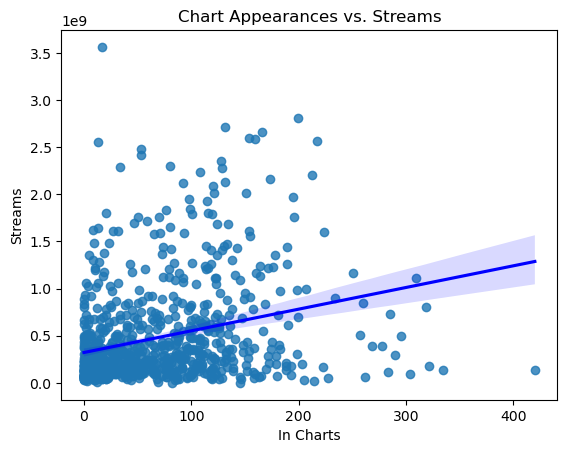

In [8]:
# Plot scatterplot of streams against chart appearances, as well as a best fit line to represent the trend

sns.regplot(data=df, x='in_charts', y='streams', line_kws={'color': 'blue'})
plt.xlabel('In Charts')
plt.ylabel('Streams')
plt.title('Chart Appearances vs. Streams')
plt.show()

This proves that number of **streams** is directly proportional to **chart appearances**

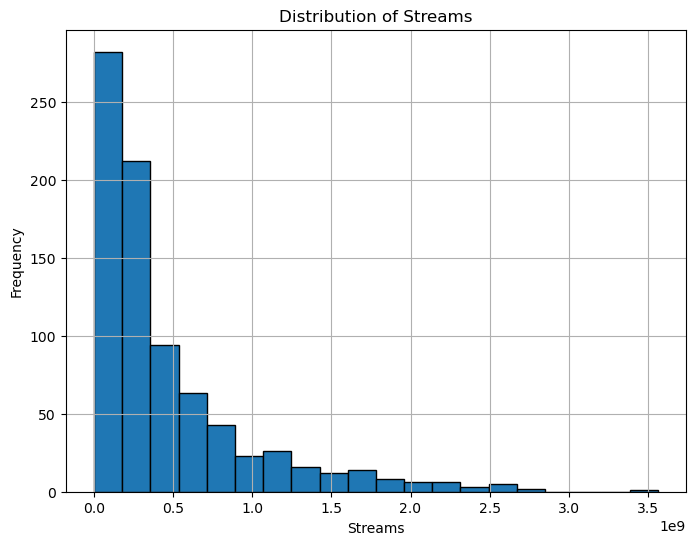

In [9]:
# Plot histogram for distribution of streams

plt.figure(figsize=(8, 6))
plt.hist(df['streams'], bins=20, edgecolor='black')
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.title('Distribution of Streams')
plt.grid(True)
plt.show()

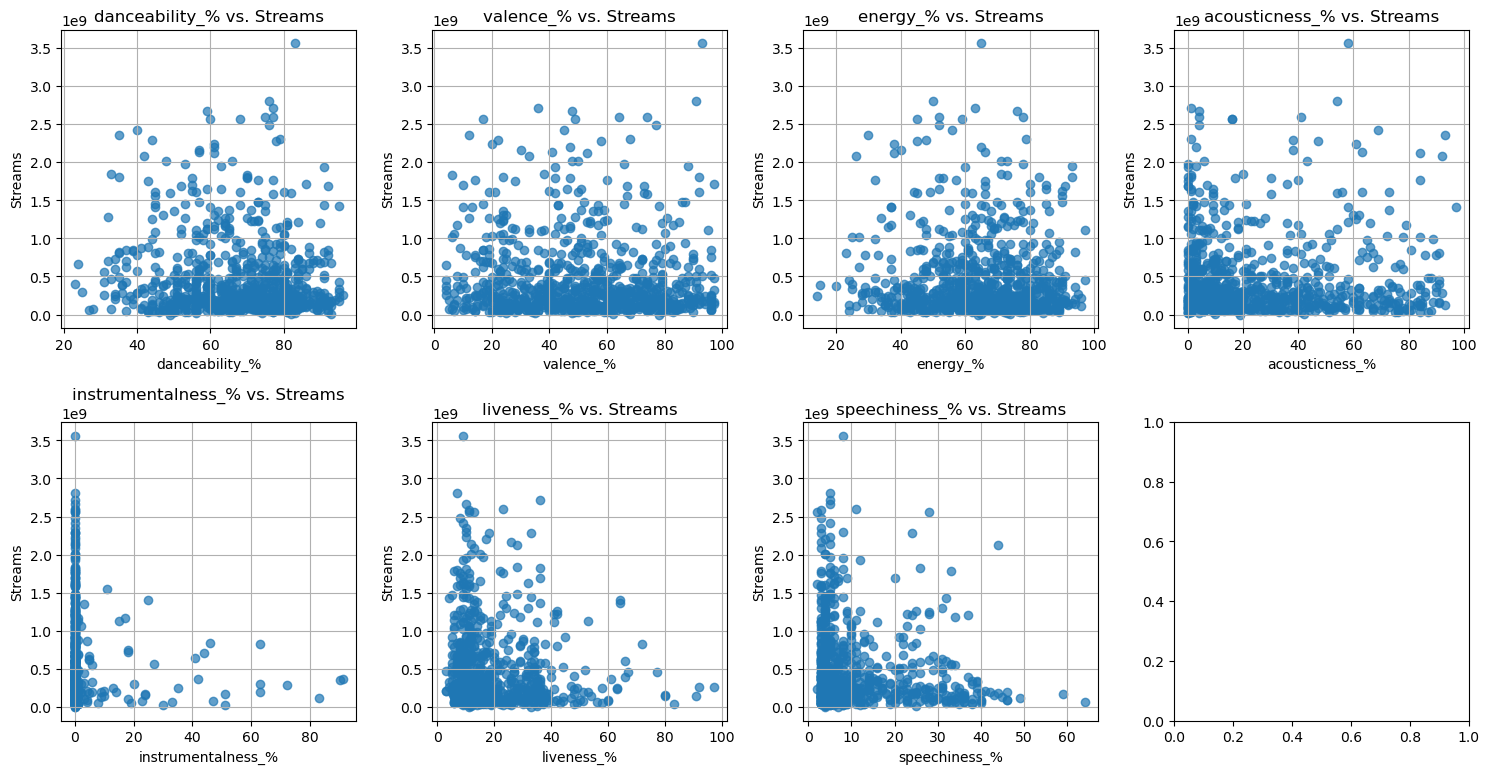

In [38]:
# Plot % against streams

features_to_plot = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(2, 4, figsize=(15,8))

for i, feature in enumerate(features_to_plot):
   col, row = divmod(i, 4)
   axes[col, row].scatter(df[feature], df['streams'], alpha=0.7)
   axes[col, row].set_xlabel(feature)
   axes[col, row].set_ylabel('Streams')
   axes[col, row].set_title(f'{feature} vs. Streams')
   axes[col, row].grid(True)

plt.tight_layout()
plt.show()